# Practical: Atomic Simulation Environment
[Atomic Simulation Environment (ASE)](https://wiki.fysik.dtu.dk/ase/) is a set of tools and Python modules for setting up, manipulating, running, visualizing and analyzing atomistic simulations. The code is freely available under the GNU LGPL license. ASE is written in the Python programming language. Compared to pymatgen, ASE is more focused on the simulation of atomic structures.

## Atoms Object
Similar to the `Structure` in pymatgen, ASE has an `Atoms` object that represents a collection of atoms. The `Atoms` object can be created by specifying the atomic positions, atomic numbers, and cell parameters. The `Atoms` object has many useful methods for manipulating and analyzing atomic structures.

### Create a simple `Atoms` object
Let's create a simple `Atoms` object for a hydrogen molecule.

In [3]:
from ase.build import molecule

# Build H2 molecule
h2 = molecule('H2')
print("H2 molecule:", h2)

H2 molecule: Atoms(symbols='H2', pbc=False)


Build a silicon crystal structure and visualize it using ASE.

In [4]:
from ase.build import bulk

# Build silicon crystal
si = bulk('Si', 'diamond', a=5.431)
print("Silicon crystal:", si)

Silicon crystal: Atoms(symbols='Si2', pbc=True, cell=[[0.0, 2.7155, 2.7155], [2.7155, 0.0, 2.7155], [2.7155, 2.7155, 0.0]])


Check atoms object attributes and methods.

In [5]:
print("Number of atoms in Si crystal:", len(si))
print("Si crystal cell:", si.cell)
print("Si crystal positions:", si.positions)
print("Si crystal atomic numbers:", si.numbers)
print("Si crystal atomic symbols:", si.get_chemical_symbols())

Number of atoms in Si crystal: 2
Si crystal cell: Cell([[0.0, 2.7155, 2.7155], [2.7155, 0.0, 2.7155], [2.7155, 2.7155, 0.0]])
Si crystal positions: [[0.      0.      0.     ]
 [1.35775 1.35775 1.35775]]
Si crystal atomic numbers: [14 14]
Si crystal atomic symbols: ['Si', 'Si']


### Visualize the `Atoms` object
You can use `x3dd` to visualize the `Atoms` object. You can install it by running the cell below.

In [6]:
from ase.visualize import view

view(si, viewer='x3d')

There are other builder function in ASE to create `Atoms` object, such as `ase.build.bulk` and `ase.build.molecule`. You can find more information in the [ASE documentation](https://wiki.fysik.dtu.dk/ase/ase/build/build.html).

In [7]:
from ase.build import nanotube

cnt = nanotube(8, 0, length=4)
print("CNT:", cnt)
view(cnt, viewer='x3d')




CNT: Atoms(symbols='C128', pbc=[False, False, True], cell=[0.0, 0.0, 17.04])


In [8]:
from ase.build import graphene
graphene_atoms = graphene(size=(4, 4, 1))
print("Graphene:", graphene_atoms)
view(graphene_atoms, viewer='x3d')

Graphene: Atoms(symbols='C32', pbc=[True, True, False], cell=[[9.84, 0.0, 0.0], [-4.92, 8.521689973238876, 0.0], [0.0, 0.0, 0.0]])


## IO
You can save the `Atoms` object to a file in various formats, such as xyz, and cif.

In [9]:
from ase.io import write
write('si.cif', si)
write('si.xyz', si,format='extxyz')



In [10]:
from ase.io import read
si2 = read('si.cif')
print("Si2 crystal:", si2)

Si2 crystal: Atoms(symbols='Si2', pbc=True, cell=[[3.8402969286241397, 0.0, 0.0], [1.9201484643120703, 3.32579469826386, 0.0], [1.9201484643120703, 1.1085982327546202, 3.1355893119688574]], spacegroup_kinds=...)


You can also create multiple `Atoms` objects and write them to a single file (`extxyz` format).

In [11]:
write(filename='structures.xyz', images=[si, cnt, graphene_atoms],format='extxyz')
structures = read('structures.xyz', index=':')
print("Structures:", structures)
print("Number of structures:", len(structures))

Structures: [Atoms(symbols='Si2', pbc=True, cell=[[0.0, 2.7155, 2.7155], [2.7155, 0.0, 2.7155], [2.7155, 2.7155, 0.0]]), Atoms(symbols='C128', pbc=[False, False, True], cell=[0.0, 0.0, 17.04]), Atoms(symbols='C32', pbc=[True, True, False], cell=[[9.84, 0.0, 0.0], [-4.92, 8.521689973238876, 0.0], [0.0, 0.0, 0.0]])]
Number of structures: 3


In [ ]:
!ase gui structures.xyz

## Calculator
ASE provides a calculator interface that allows you to perform calculations on the `Atoms` object. The calculator can be used to calculate the energy, forces, and stress of the `Atoms` object. ASE provides many calculators, such as `LAMMPS`, `VASP`, `GPAW`, etc.

## Force Fields
ASE has built-in support for many force fields, including Lennard-Jones, Morse, and EMT. They are implemented as calculators that can be attached to the `Atoms` object. The calculators can be used to calculate the energy and forces of the `Atoms` object.

You can also run DFT calculations using ASE. ASE supports many DFT codes, including VASP, Quantum ESPRESSO, and GPAW.

### Lenaard-Jones Potential
In this example, we will use the Lennard-Jones to simulate the interaction between argon atoms.

In [13]:
from ase.calculators.lj import LennardJones
from ase import Atoms
# Create Lennard-Jones calculator
lj_calculator = LennardJones(sigma=3.4, epsilon=120 * 8.617333262145e-5)

# Create a pair of argon atoms
argon = Atoms('Ar2', positions=[[0, 0, 0], [0, 0, 3.4]])

# Set the calculator for the argon atom
argon.calc = lj_calculator

# Calculate the potential energy
potential_energy = argon.get_potential_energy()
print("Potential energy of argon with Lennard-Jones potential:", potential_energy)

Potential energy of argon with Lennard-Jones potential: 5.66618107207376e-05


You can plot the potential energy curve by varying the distance between two argon atoms.

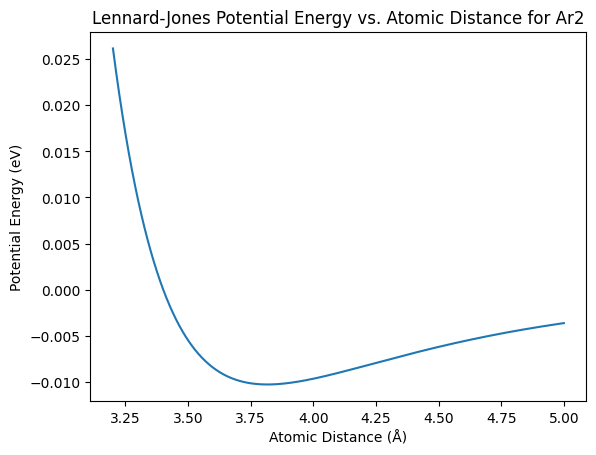

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# Create a range of distances for argon atoms
argon_distances = np.linspace(3.2, 5.0, 1000)

# Calculate energies for each distance using Lennard-Jones potential
argon_energies = []
for d in argon_distances:
    argon = Atoms('Ar2', positions=[[0, 0, 0], [0, 0, d]])
    argon.calc = lj_calculator
    argon_energies.append(argon.get_potential_energy())

# Plot the results
plt.plot(argon_distances, argon_energies)
plt.xlabel('Atomic Distance (Å)')
plt.ylabel('Potential Energy (eV)')
plt.title('Lennard-Jones Potential Energy vs. Atomic Distance for Ar2')
plt.show()

### Morse Potential
In this example, we will use the Morse potential to simulate the interaction between hydrogen atoms.

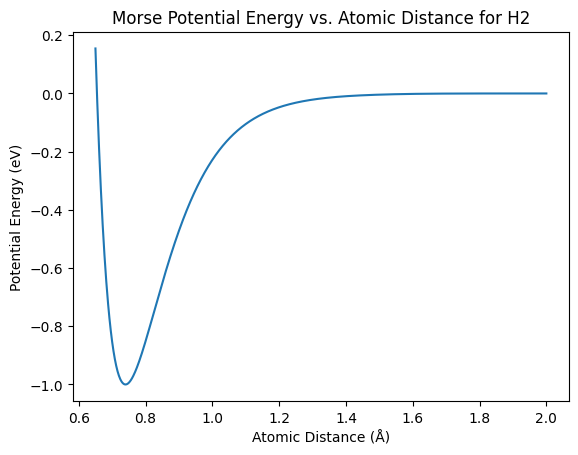

In [15]:
import numpy as np
from ase.calculators.morse import MorsePotential
from ase import Atoms
import matplotlib.pyplot as plt

# Create a range of distances
distances = np.linspace(0.65, 2, 1000)

# Initialize Morse potential calculator
morse_calculator = MorsePotential(D0=0.3429, alpha=1.02, r0=0.74)

# Calculate energies for each distance
energies = []
for d in distances:
    h2 = Atoms('H2', positions=[[0, 0, 0], [0, 0, d]])
    h2.calc = morse_calculator
    energies.append(h2.get_potential_energy())

# Plot the results
plt.plot(distances, energies)
plt.xlabel('Atomic Distance (Å)')
plt.ylabel('Potential Energy (eV)')
plt.title('Morse Potential Energy vs. Atomic Distance for H2')
plt.show()


### EMT Potential
Atomization energy of N using EMT potential.

In [16]:
from ase import Atoms
from ase.calculators.emt import EMT

atom = Atoms('N')
atom.calc = EMT()
e_atom = atom.get_potential_energy()

d = 1.1
molecule = Atoms('2N', [(0., 0., 0.), (0., 0., d)])
molecule.calc = EMT()
e_molecule = molecule.get_potential_energy()

e_atomization = e_molecule - 2 * e_atom

print('Nitrogen atom energy: %5.2f eV' % e_atom)
print('Nitrogen molecule energy: %5.2f eV' % e_molecule)
print('Atomization energy: %5.2f eV' % -e_atomization)

Nitrogen atom energy:  5.10 eV
Nitrogen molecule energy:  0.44 eV
Atomization energy:  9.76 eV


In this example, we will use the EMT potential to compute the equation of state of copper.

In [17]:
import numpy as np

from ase import Atoms
from ase.calculators.emt import EMT
from ase.io.trajectory import Trajectory

a = 4.0  # approximate lattice constant
b = a / 2
ag = Atoms('Ag',
           cell=[(0, b, b), (b, 0, b), (b, b, 0)],
           pbc=1,
           calculator=EMT())  # use EMT potential
cell = ag.get_cell()
traj = Trajectory('Ag.traj', 'w')
for x in np.linspace(0.95, 1.05, 5):
    ag.set_cell(cell * x, scale_atoms=True)
    ag.get_potential_energy()
    traj.write(ag)



100.14189241973988 GPa


<Axes: title={'center': 'sj: E: -0.000 eV, V: 16.781 Å$^3$, B: 100.142 GPa'}, xlabel='volume [Å$^3$]', ylabel='energy [eV]'>

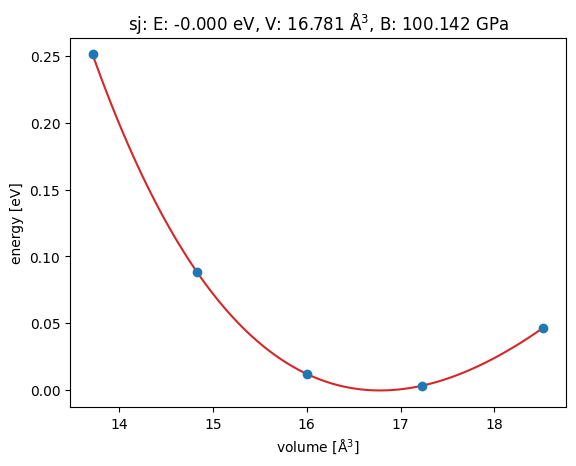

In [18]:
from ase.eos import EquationOfState
from ase.io import read
from ase.units import kJ

configs = read('Ag.traj@0:5')  # read 5 configurations
# Extract volumes and energies:
volumes = [ag.get_volume() for ag in configs]
energies = [ag.get_potential_energy() for ag in configs]
eos = EquationOfState(volumes, energies)
v0, e0, B = eos.fit()
print(B / kJ * 1.0e24, 'GPa')
eos.plot('Ag-eos.png')

## Conversion between ASE and pymatgen

ASE and pymatgen can be easily converted to each other. You can convert an `Atoms` object to a `Structure` object using the `ase_to_structure` function. You can also convert a `Structure` object to an `Atoms` object using the `structure_to_ase` function.

In this example, we will convert an `Atoms` object to a `Structure` object and vice versa.

In [19]:
from pymatgen.core import Structure, Lattice
from pymatgen.io.ase import AseAtomsAdaptor

# Create a silicon structure in pymatgen
lattice = Lattice.cubic(5.431)  # Silicon lattice constant in angstroms
structure = Structure(lattice, ["Si", "Si"], [[0, 0, 0], [0.25, 0.25, 0.25]])

# Convert pymatgen structure to ASE Atoms object
ase_atoms = AseAtomsAdaptor.get_atoms(structure)
print("ASE Atoms object:", ase_atoms)

ASE Atoms object: MSONAtoms(symbols='Si2', pbc=True, cell=[5.431, 5.431, 5.431])


In [20]:
# Convert ASE Atoms object to pymatgen Structure object
pmg_structure = AseAtomsAdaptor.get_structure(ase_atoms)
print("Pymatgen Structure object:", pmg_structure)

Pymatgen Structure object: Full Formula (Si2)
Reduced Formula: Si
abc   :   5.431000   5.431000   5.431000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0     0     0
  1  Si    0.25  0.25  0.25
